In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 1000

df = pd.read_csv("mpls_crime_2017-2022.csv", encoding="utf-8")

In [ ]:
df.head(25)

In [3]:
def cleanup_df(a_df):
     
    a_df["number"] = a_df["number"].fillna(0)
    
    a_df["neighborhood"] = a_df["neighborhood"].str.lower()    
           
    a_df["neighborhood"] = a_df["neighborhood"].replace({"carag":"south uptown", "ecco":"east bde maka ska", "west calhoun":"west maka ska"})
    
    a_df["neighborhood"] = a_df["neighborhood"].replace({"stevens square - loring heights":"steven's square - loring heights"})
    
    a_df = a_df.loc[(a_df["neighborhood"] != "z_** not assigned **") & (a_df["neighborhood"] != "** not assigned **")]
    
    a_df = a_df.drop("neighborhoodCrimeStatisticsID", axis=1)
            
    return a_df

In [4]:
# Breakpoint

clean_df = cleanup_df(df)

df = clean_df.copy()

In [ ]:
# To check df

# (df
     #["neighborhood"]
     #.sort_values()
     #.value_counts()  # 480 data points for each neighborhood, accounting for name changes!
     #.nunique()        # 87 neighborhoods
# )

In [5]:
# Mpls Neighborhood "Communities"

CALHOUN_ISLES = ["bryn - mawr", "cedar - isles - dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]
CAMDEN =        ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind - bohanon", "mckinley", \
                 "shingle creek", "victory", "webber - camden"]
CENTRAL =       ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "steven's square - loring heights"]
LONGFELLOW =    ["cooper", "hiawatha", "howe", "longfellow", "seward"]
NEAR_NORTH =    ["harrison", "hawthorne", "jordan", "near - north", "sumner - glenwood", "willard - hay"]
NOKOMIS =       ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
                 "northrop", "page", "regina", "wenonah"]
NORTHEAST =     ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
                 "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]
PHILLIPS =      ["east phillips", "midtown phillips", "phillips west", "ventura village"]
POWDERHORN =    ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]
SOUTHWEST =     ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", \
                 "windom"]
UNIVERSITY =    ["cedar riverside", "como", "marcy holmes", "mid - city industrial", "nicollet island - east bank", \
                 "prospect park - east river road", "university of minnesota"]

In [6]:
# Make list of communities names, each a list of neighborhoods

COMMUNITIES =   ["CALHOUN_ISLES", "CAMDEN", "CENTRAL", "LONGFELLOW", "NEAR_NORTH", "NOKOMIS", "NORTHEAST", \
                 "PHILLIPS", "POWDERHORN", "SOUTHWEST", "UNIVERSITY"]

In [7]:
# As per FBI ucr reporting standards

VIOLENT_CRIMES =  ["Aggravated Assault", "Homicide", "Rape", "Robbery"]
PROPERTY_CRIMES = ["Arson", "Auto Theft", "Burglary", "Larceny"]

In [8]:
# All crime 

before_all = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) ]
before_all = before_all.sort_values(by=["neighborhood", "ucrDescription"])

before_all = before_all.drop(["reportMonth", "reportYear"], axis=1)

# before_all


after_all = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) ]
after_all = after_all.sort_values(by=["neighborhood", "ucrDescription"])

after_all = after_all.drop(["reportMonth", "reportYear"], axis=1)

# after_all

In [9]:
# Narrow down to just months and type of crime I'm interested in

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(VIOLENT_CRIMES)) ]
before_violent = before_violent.sort_values(by=["neighborhood", "ucrDescription"])

before_violent = before_violent.drop(["reportMonth", "reportYear"], axis=1)

# before_violent["number"].describe()

In [10]:
after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(VIOLENT_CRIMES)) ]
after_violent = after_violent.sort_values(by=["neighborhood", "ucrDescription"])

after_violent = after_violent.drop(["reportMonth", "reportYear"], axis=1)

# after_violent["number"].describe()

In [11]:
before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(PROPERTY_CRIMES)) ]
before_property = before_property.sort_values(by=["neighborhood", "ucrDescription"])

before_property = before_property.drop(["reportMonth", "reportYear"], axis=1)

# before_property["number"].describe()

In [12]:
after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(PROPERTY_CRIMES)) ]
after_property = after_property.sort_values(by=["neighborhood", "ucrDescription"])

after_property = after_property.drop(["reportMonth", "reportYear"], axis=1)

# after_property["number"].describe()

In [13]:
CALH_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_before_all = int(before_all.loc[ (before_all["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [14]:
CALH_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_after_all = int(after_all.loc[ (after_all["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [15]:
CALH_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bp = int(before_property.loc[ (before_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bp = int(before_property.loc[ (before_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bp = int(before_property.loc[ (before_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [16]:
CALH_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_ap = int(after_property.loc[ (after_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_ap = int(after_property.loc[ (after_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_ap = int(after_property.loc[ (after_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [17]:
CALH_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [18]:
CALH_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [19]:
bp = [CALH_bp, CAMD_bp, CENT_bp, LONG_bp, NEAR_bp, NOKO_bp, NORT_bp, PHIL_bp, POWD_bp, SOUT_bp, UNIV_bp]
ap = [CALH_ap, CAMD_ap, CENT_ap, LONG_ap, NEAR_ap, NOKO_ap, NORT_ap, PHIL_ap, POWD_ap, SOUT_ap, UNIV_ap]

bv = [CALH_bv, CAMD_bv, CENT_bv, LONG_bv, NEAR_bv, NOKO_bv, NORT_bv, PHIL_bv, POWD_bv, SOUT_bv, UNIV_bv]
av = [CALH_av, CAMD_av, CENT_av, LONG_av, NEAR_av, NOKO_av, NORT_av, PHIL_av, POWD_av, SOUT_av, UNIV_av]

In [20]:
b_all = [CALH_before_all, CAMD_before_all, CENT_before_all, LONG_before_all, \
         NEAR_before_all, NOKO_before_all, NORT_before_all, PHIL_before_all, \
         POWD_before_all, SOUT_before_all, UNIV_before_all]

In [21]:
a_all = [CALH_after_all, CAMD_after_all, CENT_after_all, LONG_after_all, NEAR_after_all, \
         NOKO_after_all, NORT_after_all, PHIL_after_all, POWD_after_all, SOUT_after_all, UNIV_after_all]

In [22]:
plot_df_prop = pd.DataFrame(index=COMMUNITIES, data={"Property_Before":bp, "Property_After":ap, \
                                                     "%_Change": 0, "Difference":0})

plot_df_viol = pd.DataFrame(index=COMMUNITIES, data={"Violent_Before":bv, "Violent_After":av, \
                                                     "%_Change": 0, "Difference":0})
   
plot_df_prop["%_Change"] = (plot_df_prop["Property_After"] - plot_df_prop["Property_Before"]) / plot_df_prop["Property_Before"] * 100
plot_df_viol["%_Change"] = (plot_df_viol["Violent_After"] - plot_df_viol["Violent_Before"]) / plot_df_viol["Violent_Before"] * 100

plot_df_prop["Difference"] = plot_df_prop["Property_After"] - plot_df_prop["Property_Before"]
plot_df_viol["Difference"] = plot_df_viol["Violent_After"] - plot_df_viol["Violent_Before"]


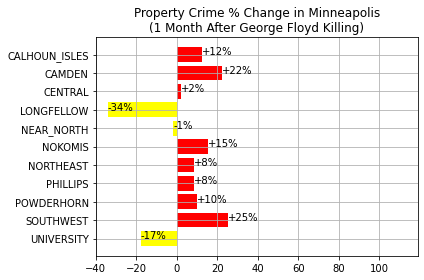

In [23]:
# % Change in Property Crime 1 Month Before and After GF  

plot_df_prop["positive"] = plot_df_prop["%_Change"] >= 0

x = COMMUNITIES
y = plot_df_prop["%_Change"]
z = plot_df_prop["positive"]

plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title(f"Property Crime % Change in Minneapolis\n(1 Month After George Floyd Killing)")
plt.grid()
plt.tight_layout()

plt.savefig("PercentChangeProperty.png")

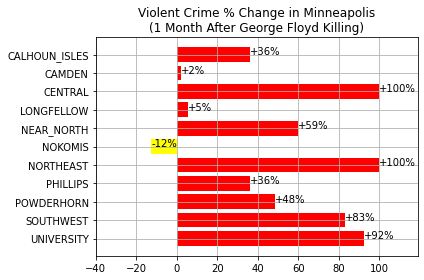

In [24]:
# % Change in Violent Crime 1 Month Before and After GF  

plot_df_viol["positive"] = plot_df_viol["%_Change"] >= 0

x = COMMUNITIES
y = plot_df_viol["%_Change"]
z = plot_df_viol["positive"]


plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title(f"Violent Crime % Change in Minneapolis\n(1 Month After George Floyd Killing)")
plt.grid()

plt.tight_layout()

plt.savefig("PercentChangeViolent.png")

In [25]:
plot_df_all = pd.DataFrame(index=COMMUNITIES, data={"All_Before":b_all, "All_After":a_all, \
                                                    "%_Change": 0, "Difference":0})
   
plot_df_all["%_Change"] = ((plot_df_all["All_After"] - plot_df_all["All_Before"]) / plot_df_all["All_Before"]) * 100
plot_df_all["Difference"] = plot_df_all["All_After"] - plot_df_all["All_Before"]

plot_df_all

,All_Before,All_After,%_Change,Difference
CALHOUN_ISLES,182,207,13.736264,25
CAMDEN,122,140,14.754098,18
CENTRAL,205,244,19.024390,39
LONGFELLOW,194,135,-30.412371,-59
NEAR_NORTH,178,216,21.348315,38
NOKOMIS,92,104,13.043478,12
NORTHEAST,117,136,16.239316,19
PHILLIPS,176,205,16.477273,29
POWDERHORN,289,334,15.570934,45
SOUTHWEST,93,120,29.032258,27


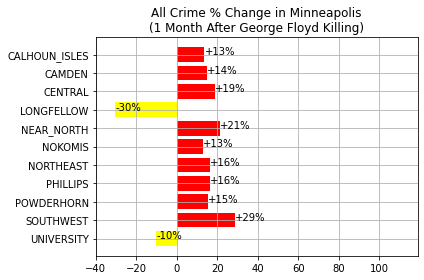

In [26]:
# % Change in Violent Crime 1 Month Before and After GF  

plot_df_all["positive"] = plot_df_all["%_Change"] >= 0

x = COMMUNITIES
y = plot_df_all["%_Change"]
z = plot_df_all["positive"]

plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title(f"All Crime % Change in Minneapolis\n(1 Month After George Floyd Killing)")
plt.grid()

plt.tight_layout()

plt.savefig("PercentChangeAll.png")

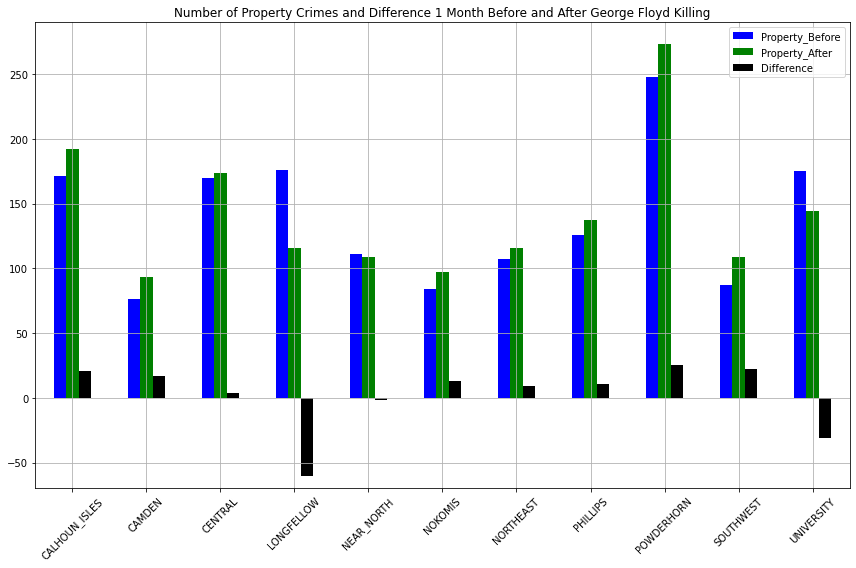

In [27]:
plot_df_prop[["Property_Before", "Property_After", "Difference"]].plot.bar(color=["blue","green","black"], figsize=(12,8))
plt.ylim(-70, 290)
plt.xticks(rotation=45)
plt.grid()
plt.title("Number of Property Crimes and Difference 1 Month Before and After George Floyd Killing")
plt.tight_layout()

plt.savefig("Property_Before_After.png")

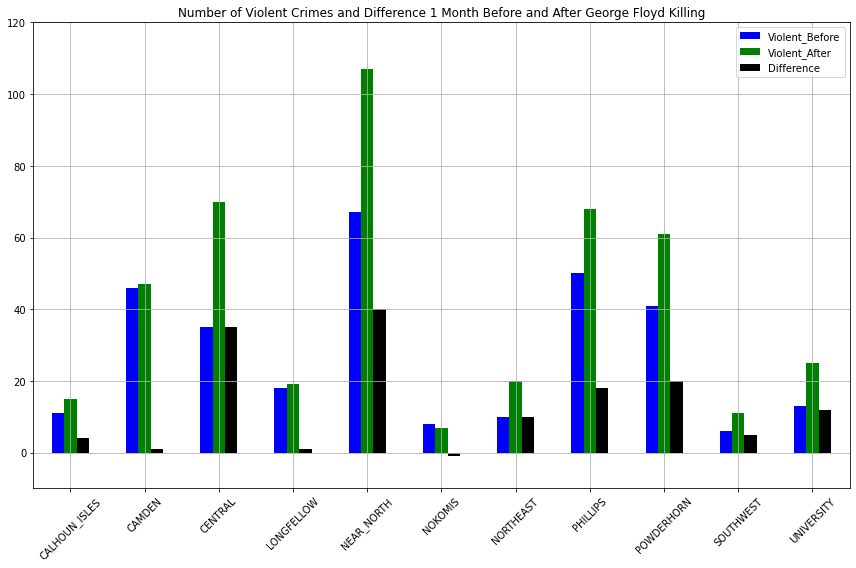

In [28]:
plot_df_viol[["Violent_Before", "Violent_After", "Difference"]].plot.bar(color=["blue","green","black"], figsize=(12,8))
plt.ylim(-10, 120)
plt.xticks(rotation=45)
plt.grid()
plt.title("Number of Violent Crimes and Difference 1 Month Before and After George Floyd Killing")
plt.tight_layout()

plt.savefig("Violent_Before_After.png")

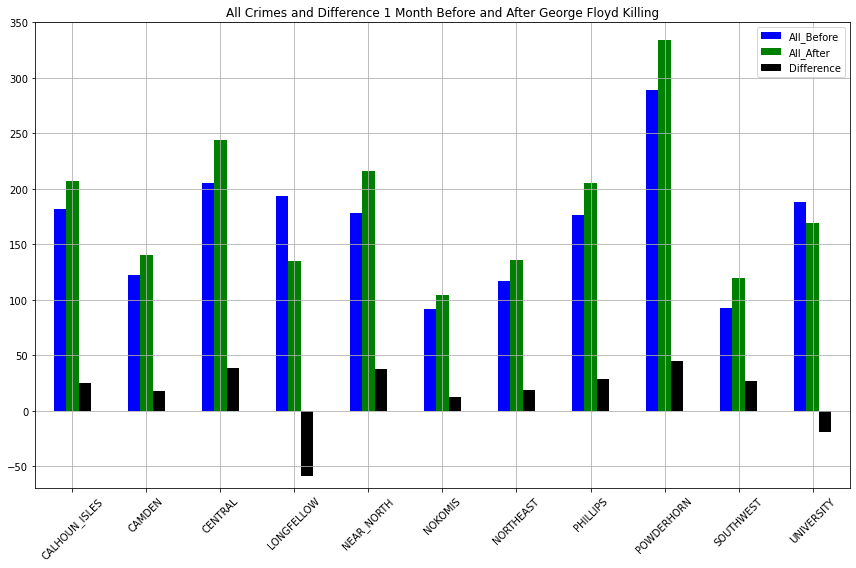

In [30]:
plot_df_all[["All_Before", "All_After", "Difference"]].plot.bar(color=["blue", "green", "black"], figsize=(12,8))

plt.ylim(-70, 350)
plt.xticks(rotation=45)
plt.grid()
plt.title("All Crimes and Difference 1 Month Before and After George Floyd Killing")
plt.tight_layout()

plt.savefig("All_Before_After.png")

In [ ]:
# T-test for property crime before and after GF

st.ttest_ind(bp, ap, equal_var=False) 

In [ ]:
# T-test for violent crime before and after GF

st.ttest_ind(bv, av, equal_var=False) 

In [ ]:
# T-test for all crime before and after GF

st.ttest_ind(b_all, a_all, equal_var=False) 